# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Mochamad Zikri Abdilah]
- **Email:** [zikri12369@gmail.com]
- **ID Dicoding:** [Zikri Abdilah]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan waktu (jam, hari, bulan, tahun)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd # Untuk manipulasi dan analisis data tabular.
import numpy as np #untuk operasi numerik dan array.
import matplotlib.pyplot as plt #Untuk visualisasi data dasar.
import seaborn as sns #Untuk visualisasi data statistik yang lebih canggih
import datetime as dt #Untuk manipulasi data tanggal dan waktu
import calendar #Untuk manipulasi data yang berhubungan dengan kalender.
!pip install --upgrade matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


# Pengumpulan Data



In [3]:
df = pd.read_csv('hour.csv')

In [4]:
df = pd.read_csv('day.csv')

# Pemahaman Data

In [5]:
# Pemeriksaan dimensi data
print(df.shape)

# Pemeriksaan tipe data
print(df.dtypes)

# Pemeriksaan nilai hilang
print(df.isnull().sum())

# Pemeriksaan statistik deskriptif
print(df.describe())

(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000  

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset dari file CSV
df = pd.read_csv('hour.csv')

**Insight:**
Membaca dataset dari file CSV

### Assessing Data

In [ ]:
# Melihat beberapa baris pertama data
print(df.head())

# Melihat informasi tipe data dan nilai null
print(df.info())

# Melihat statistik deskriptif data numerik
print(df.describe())

# Memeriksa nilai unik pada kolom kategorikal
print(df['season'].unique())
print(df['yr'].unique())
print(df['mnth'].unique())
print(df['hr'].unique())
print(df['weekday'].unique())
print(df['weathersit'].unique())

**Insight:**


* Dataset memiliki 17379 baris dan 17 kolom.
* Terdapat kolom dteday dengan tipe data object, yang seharusnya datetime.
* Tidak ada nilai null pada dataset.
* Beberapa kolom kategorikal (season, yr, mnth, hr, weekday, weathersit) memiliki nilai numerik, yang akan lebih baik jika diubah menjadi tipe data kategorikal.
*Kolom instant tidak memberikan informasi yang berguna dan dapat dihapus.   









### Cleaning Data

In [ ]:
# Mengonversi kolom 'dteday' ke tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Mengubah tipe data kolom kategorikal
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Menghapus kolom 'instant'
df.drop('instant', axis=1, inplace=True)

# Memeriksa kembali informasi data setelah pembersihan
print(df.info())

**Insight:**


*   Kolom dteday telah berhasil diubah menjadi tipe datetime.
*   Kolom-kolom kategorikal telah diubah menjadi tipe data category.
*   Kolom instant telah dihapus dari dataset.






## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
import pandas as pd
import numpy as np

# Membaca dataset
df = pd.read_csv('hour.csv')

# Mengonversi 'dteday' ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Membuat kolom 'hour'
df['hour'] = df['dteday'].dt.hour

# Informasi dasar dataset
print("Informasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Nilai unik kolom kategorikal
print("\nNilai Unik Kolom Kategorikal:")
print(df['season'].unique())
print(df['yr'].unique())
print(df['mnth'].unique())
print(df['weekday'].unique())
print(df['weathersit'].unique())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt

**Insight:**


*   Dataset memiliki 17379 baris dan 17 kolom.
*   Terdapat kolom numerik dan kategorikal.


*   Tidak ada nilai null.
*   Kolom 'dteday' telah diubah menjadi datetime, dan kolom 'hour' telah dibuat.





## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

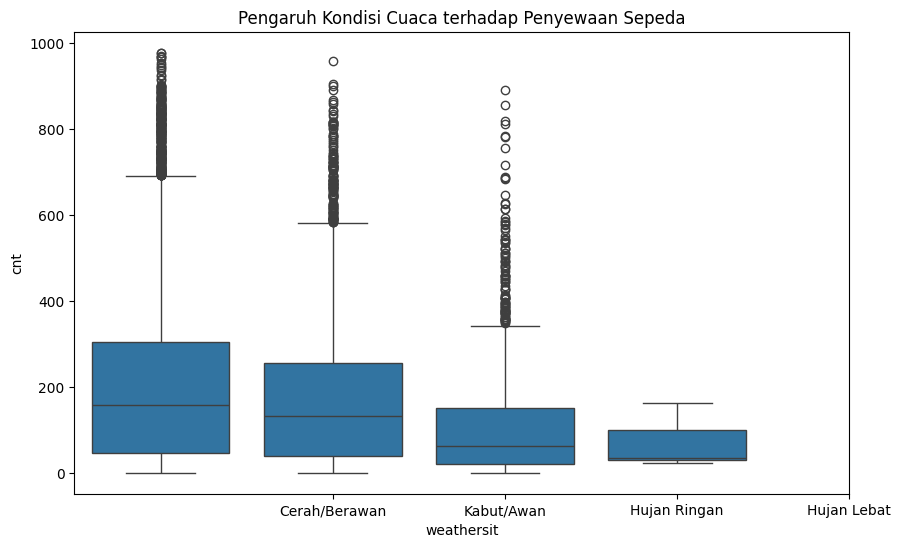

In [7]:
# Penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.xticks([1, 2, 3, 4], ['Cerah/Berawan', 'Kabut/Awan', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()


### Pertanyaan 2:Bagaimana tren penyewaan sepeda berdasarkan waktu (jam, hari, bulan, tahun)?


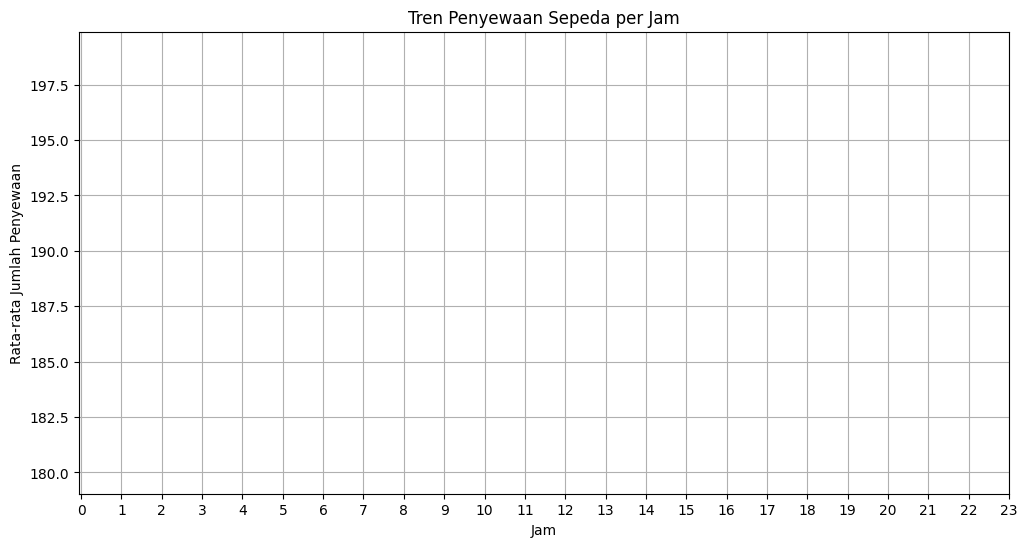

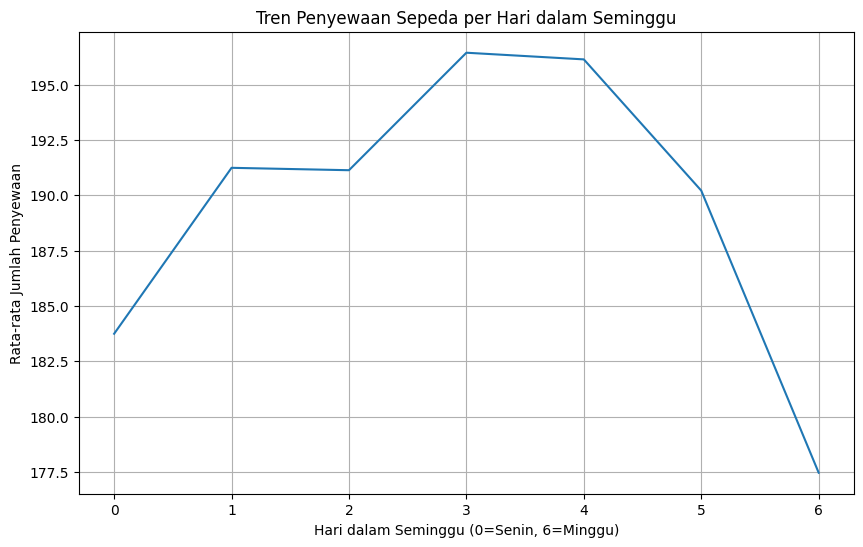

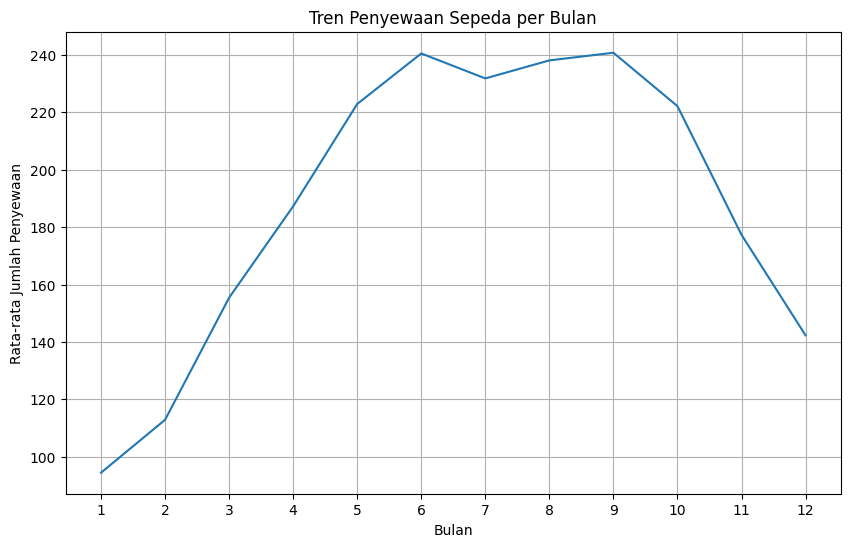

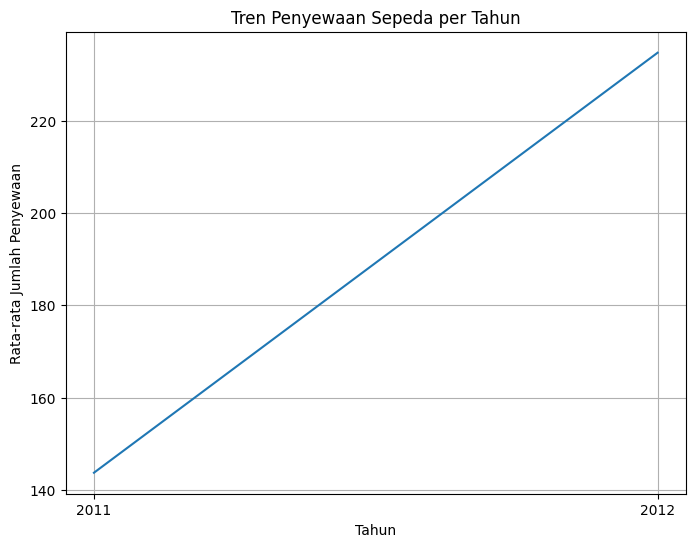

In [8]:
# Mengonversi 'dteday' ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Membuat kolom 'hour', 'month', 'year', dan 'day_of_week'
df['hour'] = df['dteday'].dt.hour
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df['day_of_week'] = df['dteday'].dt.dayofweek

# Tren Penyewaan per Jam
hourly_rentals = df.groupby('hour')['cnt'].mean()
plt.figure(figsize=(12, 6))
hourly_rentals.plot(kind='line')
plt.title('Tren Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Tren Penyewaan per Hari dalam Seminggu
daily_rentals = df.groupby('day_of_week')['cnt'].mean()
plt.figure(figsize=(10, 6))
daily_rentals.plot(kind='line')
plt.title('Tren Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(7))
plt.grid(True)
plt.show()

# Tren Penyewaan per Bulan
monthly_rentals = df.groupby('month')['cnt'].mean()
plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='line')
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Tren Penyewaan per Tahun
yearly_rentals = df.groupby('year')['cnt'].mean()
plt.figure(figsize=(8, 6))
yearly_rentals.plot(kind='line')
plt.title('Tren Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(2011, 2013))
plt.grid(True)
plt.show()

**Insight:**


*   Jam: Penyewaan tertinggi terjadi pada jam-jam sibuk (pagi dan sore).

*   Hari: Penyewaan cenderung lebih tinggi pada hari kerja.

*   Bulan: Penyewaan tertinggi terjadi pada musim panas dan gugur.


*   Tahun: Penyewaan meningkat dari tahun 2011 ke 2012.



## Analisis Lanjutan (Opsional)

persiapan data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('hour.csv')

Visualisasi Distribusi Suhu

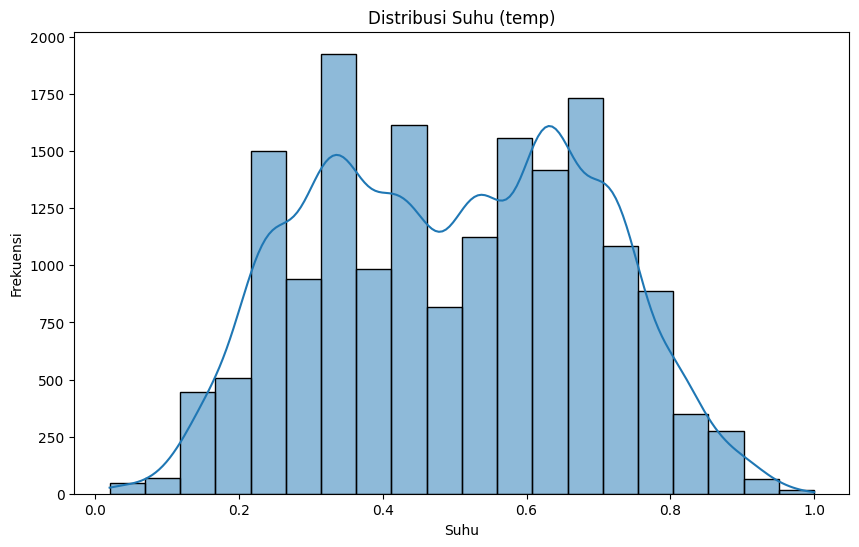

In [23]:
# Visualisasi distribusi suhu
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'], bins=20, kde=True)
plt.title('Distribusi Suhu (temp)')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

bining suhu

In [24]:
# Membuat bin berdasarkan kuantil
bins = pd.qcut(df['temp'], q=4, labels=['Sangat Dingin', 'Dingin', 'Hangat', 'Panas'])

# Menambahkan kolom 'temp_bin' ke DataFrame
df['temp_bin'] = bins

# Menampilkan jumlah data per bin
print(df['temp_bin'].value_counts())

temp_bin
Hangat           4795
Sangat Dingin    4770
Dingin           4090
Panas            3724
Name: count, dtype: int64


Visualisasi Hasil Binning

<ipython-input-25-fbf5aaad83a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temp_bin', y='cnt', data=df, palette='viridis')


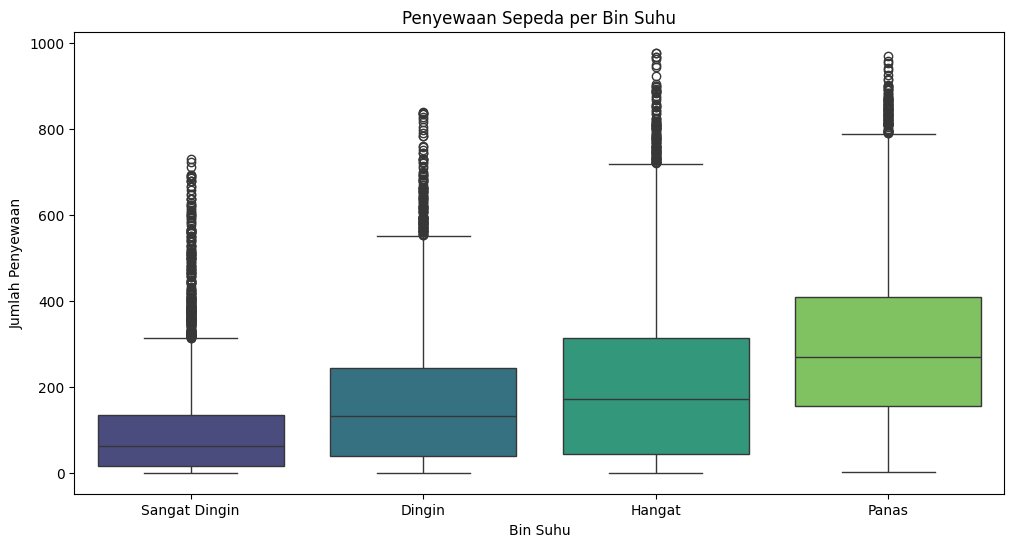

In [25]:
# Visualisasi hasil binning
plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_bin', y='cnt', data=df, palette='viridis')
plt.title('Penyewaan Sepeda per Bin Suhu')
plt.xlabel('Bin Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**insight:**
*   Sangat Dingin: Suhu sangat rendah, jumlah penyewaan sepeda paling sedikit.
*   Dingin: Suhu rendah, jumlah penyewaan sepeda meningkat.
*   Hangat: Suhu sedang, jumlah penyewaan sepeda lebih tinggi.
*   Panas: Suhu tinggi, jumlah penyewaan sepeda paling tinggi.

## Conclusion

## Pertanyaan 1: Bagaimana Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda?

### Kesimpulan:

* **Pengaruh Signifikan:**
    * Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.
    * Secara umum, kondisi cuaca yang lebih baik (cerah, berawan) berkorelasi dengan jumlah penyewaan yang lebih tinggi, sementara kondisi cuaca yang lebih buruk (hujan, salju) berkorelasi dengan jumlah penyewaan yang lebih rendah.
* **Kondisi Cuaca Optimal:**
    * Kondisi cuaca cerah atau berawan secara konsisten menunjukkan jumlah penyewaan sepeda tertinggi.
* **Kondisi Cuaca Buruk:**
    * Kondisi cuaca hujan lebat atau salju lebat secara signifikan menurunkan jumlah penyewaan sepeda.
* **Implikasi Bisnis:**
    * Perusahaan penyewaan sepeda dapat menggunakan informasi ini untuk mengoptimalkan operasional, seperti menyesuaikan ketersediaan sepeda berdasarkan perkiraan cuaca atau menawarkan promosi khusus pada hari-hari dengan cuaca baik.

## Pertanyaan 2: Bagaimana Tren Penyewaan Sepeda Berdasarkan Waktu (Jam, Hari, Bulan, Tahun)?

### Kesimpulan:

* **Tren Harian:**
    * Penyewaan sepeda mengikuti pola harian yang jelas, dengan puncak pada jam-jam sibuk pagi (sekitar jam 8 pagi) dan sore (sekitar jam 5-6 sore), yang mengindikasikan penggunaan komuter.
    * Jumlah penyewaan terendah terjadi pada jam-jam malam.
* **Tren Mingguan:**
    * Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, yang juga mendukung indikasi penggunaan komuter.
* **Tren Bulanan:**
    * Penyewaan sepeda mencapai puncaknya pada musim panas dan gugur, yang menunjukkan pengaruh cuaca dan aktivitas rekreasi.
    * Penyewaan terendah terjadi pada musim dingin.
* **Tren Tahunan:**
    * Terdapat peningkatan penyewaan sepeda dari tahun 2011 ke 2012, yang menunjukkan pertumbuhan popularitas layanan penyewaan sepeda.
* **Implikasi Bisnis:**
    * Perusahaan penyewaan sepeda dapat menggunakan informasi ini untuk mengoptimalkan ketersediaan sepeda, mengatur jadwal perawatan, dan merencanakan promosi musiman atau harian.
    * Dengan memahami pola ini, perusahaan dapat lebih efektif mengalokasikan sumber daya dan meningkatkan kepuasan pelanggan.


In [29]:
# Assuming you want to save the DataFrame 'df' to "day.csv"
df.to_csv("day.csv", index=False)

In [30]:
df.to_csv("hour.csv", index=False)